In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import warnings
warnings.filterwarnings("ignore")

In [44]:
train = pd.read_csv("train 2.csv")
test = pd.read_csv("test.csv")

In [47]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print(train.shape,test.shape)

(42000, 785) (28000, 784)


In [49]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Given images are not already normalized (i.e. the pixel values are in the range [0,255]).
# So normalize them by dividing by 255
X_train = X_train / 255.0
test = test / 255.0

In [50]:
X_train.values.shape

(42000, 784)

In [51]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [52]:
X_train.shape

(42000, 28, 28, 1)

Augmentation
Following Augmentation have been applied on this set of 42,000 images training images.

1. rotation_range:
To randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.
2. zoom_range = 0.10,
3. Random Shifts with width_shift_range and height_shift_range


Image before augmentation

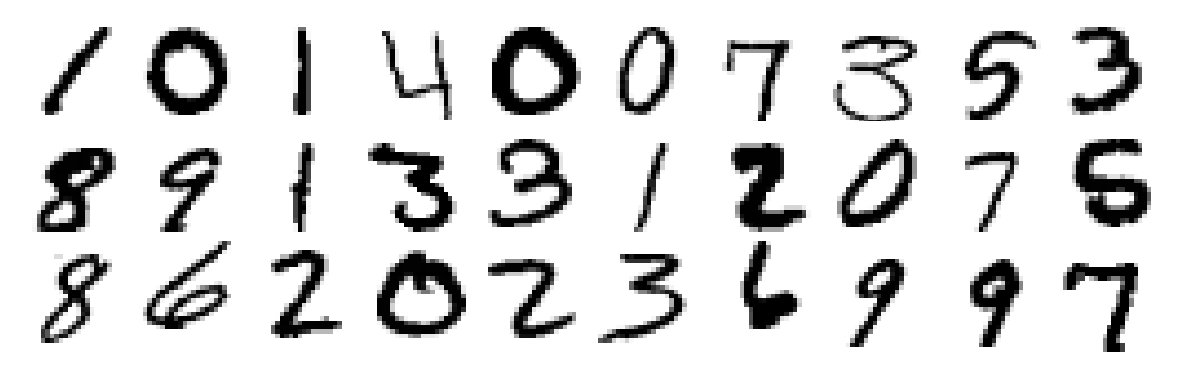

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [54]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images through any degree between 0 and 360
        zoom_range = 0.10,
        width_shift_range=0.1, # a float number, that would indicate the percentage of width or height of the image to shift.
        height_shift_range=0.1)

In [56]:
X_train.shape # (42000, 28, 28, 1)
X_train[25,].shape # (28, 28, 1)
X_train[25,].reshape((1,28,28,1)).shape # (1, 28, 28, 1)

(1, 28, 28, 1)

In [57]:
X_train[25,].shape

(28, 28, 1)

In [59]:
X_train[41999,].shape

(28, 28, 1)

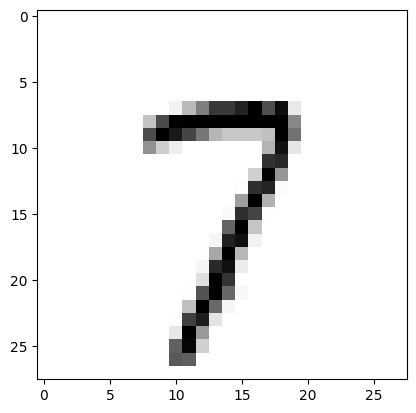

In [60]:
plt.imshow(X_train[18,].reshape((28,28)),cmap=plt.cm.binary)

Plotting augmented images by taking a single row of data

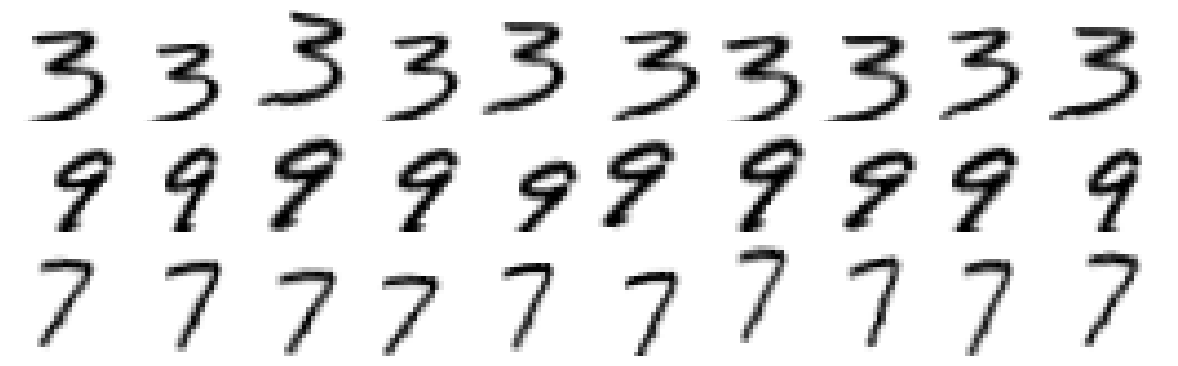

In [61]:

X_train_random = X_train[25,].reshape((1,28,28,1))
Y_train_random = Y_train[25,].reshape((1,10))

plt.figure(figsize=(15,4.5))

for i in range(30):
    plt.subplot(3, 10, i+1)
    X_train_augmented, Y_train_augmented = datagen.flow(X_train_random,Y_train_random).next()
    plt.imshow(X_train_augmented[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    # Now for the second and third row take 2 different digit
    # 9 and 7 respectively
    # And because I am printing 9 columns for the same image, I have to
    # advance the 'i' value by 10
    if i==9:
        X_train_random = X_train[11,].reshape((1,28,28,1))
    if i==19:
        X_train_random = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

**LeNet5** Architecture

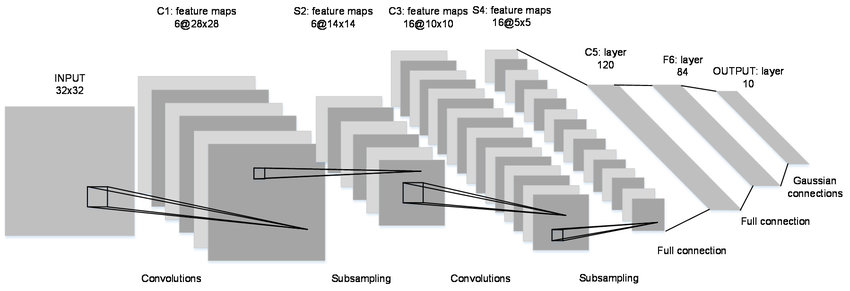

In [62]:
def build_model(num_cnn):
    model = [0] *num_cnn
    for j in range(num_cnn):
        model[j] = Sequential()

        model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1))) # Two stacked 3x3 filters instead of single 5x5 filters.
        model[j].add(BatchNormalization()) # Batch normalization is added
        model[j].add(Conv2D(32, kernel_size = 3, activation='relu')) # and ReLU activation replaces sigmoid.
        model[j].add(BatchNormalization())
        model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu')) # Stride 2 replaces pooling layers. These become learnable pooling layers.
        model[j].add(BatchNormalization())
        model[j].add(Dropout(0.4)) #  Dropout is added

        model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Dropout(0.4))

        model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Flatten())
        model[j].add(Dropout(0.4))
        model[j].add(Dense(10, activation='softmax'))

        model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [ ]:
num_cnn=10
model = build_model(num_cnn)

Train 10 models

In [63]:
def train(num_epochs):
    # Keep reducing the Learning Rate
    lr_scheduler = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
    # Training starts
    history = [0] * num_cnn
    for cnn in range(num_cnn):
        X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(
            X_train, Y_train, test_size=0.1
        )
        history[cnn] = model[cnn].fit(
            datagen.flow(X_train_split, Y_train_split, batch_size=64),
            epochs=num_epochs,
            steps_per_epoch=X_train_split.shape[0] // 64,
            validation_data=(X_val_split, Y_val_split),
            callbacks=[lr_scheduler],
            verbose=0,
        )
        print(
            "CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
                cnn + 1,
                num_epochs,
                max(history[cnn].history["accuracy"]),
                max(history[cnn].history["val_accuracy"]),
            )
        )

LearningRateScheduler

At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

In [64]:
# num_epochs = 1  # First running for 1 epoch only to check all is working fine
num_epochs = 1
train(num_epochs)

CNN 1: Epochs=1, Train accuracy=0.98158, Validation accuracy=0.99333
CNN 2: Epochs=1, Train accuracy=0.98015, Validation accuracy=0.98524
CNN 3: Epochs=1, Train accuracy=0.97843, Validation accuracy=0.98929
CNN 4: Epochs=1, Train accuracy=0.97970, Validation accuracy=0.99119
CNN 5: Epochs=1, Train accuracy=0.98076, Validation accuracy=0.99286
CNN 6: Epochs=1, Train accuracy=0.97986, Validation accuracy=0.99262
CNN 7: Epochs=1, Train accuracy=0.98081, Validation accuracy=0.98786
CNN 8: Epochs=1, Train accuracy=0.98007, Validation accuracy=0.98905
CNN 9: Epochs=1, Train accuracy=0.95561, Validation accuracy=0.98833
CNN 10: Epochs=1, Train accuracy=0.85404, Validation accuracy=0.94071


In [65]:
X_test.shape

(28000, 28, 28, 1)

In [66]:
final_ensemble_prediction = np.zeros( (X_test.shape[0],10) )

final_ensemble_prediction.shape

(28000, 10)

In [67]:
for j in range(num_cnn):
    final_ensemble_prediction = np.zeros( (X_test.shape[0],10) )
    final_ensemble_prediction = final_ensemble_prediction + model[j].predict(X_test)

    final_ensemble_prediction = np.argmax(final_ensemble_prediction,axis = 1)

#     print("final_ensemble_prediction.shape ", final_ensemble_prediction.shape)

    final_ensemble_prediction = pd.Series(final_ensemble_prediction,name="Label")

    final_ensemble_prediction


875/875 [==============================] - 18s 21ms/step


In [116]:
final_ensemble_prediction.to_numpy()


array([2, 0, 8, ..., 3, 4, 2])

Taking a random sample and showing classification report

In [87]:
train = pd.read_csv("train 2.csv")
test = pd.read_csv("test.csv")

In [88]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Given images are not already normalized (i.e. the pixel values are in the range [0,255]).
# So normalize them by dividing by 255
X_train = X_train / 255.0
test = test / 255.0

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [108]:
y_pred=0
for i in range(10):
  y_pred=y_pred+model[i].predict(X_test.values.reshape(-1,28,28,1))

189/189 [==============================] - 4s 22ms/step


In [109]:
y_pred=np.argmax(y_pred,axis=1)

In [110]:
y_pred

array([7, 2, 2, ..., 7, 7, 1])

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       584
           1       1.00      1.00      1.00       673
           2       1.00      1.00      1.00       592
           3       1.00      1.00      1.00       596
           4       0.99      0.99      0.99       594
           5       1.00      0.99      0.99       535
           6       0.99      1.00      0.99       608
           7       0.99      1.00      1.00       651
           8       1.00      1.00      1.00       587
           9       0.99      0.99      0.99       628

    accuracy                           1.00      6048
   macro avg       1.00      1.00      1.00      6048
weighted avg       1.00      1.00      1.00      6048

